<a href="https://colab.research.google.com/github/CodyBurker/W266_Group_Project/blob/CodyCNNBase/CNN-word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [60]:
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk
import numpy as np

In [61]:
!git clone https://github.com/CodyBurker/W266_Group_Project

fatal: destination path 'W266_Group_Project' already exists and is not an empty directory.


In [62]:
def read_in_data(path="W266_Group_Project/"):
    import pandas as pd
    X_train = pd.read_csv(path + "x_train_sampled_yelp_data.csv")
    y_train = pd.read_csv(path + "y_train_sampled_yelp_data.csv")
    X_test = pd.read_csv(path + "x_test_sampled_yelp_data.csv")
    y_test = pd.read_csv(path + "y_test_sampled_yelp_data.csv")
    return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = read_in_data()
y_train = np.array(y_train.stars.astype('int')) - 1
y_test = np.array(y_test.stars.astype('int')) - 1

https://towardsdev.com/sentiment-analysis-with-cnn-using-keras-c4debff57fc5?gi=708b4ef40e2f

Encode text and pad it.

Word2Vec: https://machinelearningknowledge.ai/word2vec-in-gensim-explained-for-creating-word-embedding-models-pretrained-and-custom/

https://stackoverflow.com/questions/51492778/how-to-properly-use-get-keras-embedding-in-gensim-s-word2vec

In [67]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [72]:
wv_vocab ={word: vector.index for word, vector in wv.vocab.items()}

In [77]:
num_words = len(wv_vocab)

In [ ]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# Tokenizer(num_words=len(vocabulary)) tk.word_index = vocabulary tk.texts_to_sequences(samples)

tokenizer = Tokenizer( vocabulary = wv_vocab, 
                      num_words=num_words
                       )



In [84]:
tokenizer.word_index = wv_vocab
X_train['encoded'] = tokenizer.texts_to_sequences(X_train['text'])
X_test['encoded'] = tokenizer.texts_to_sequences(X_test['text'])

(array([47487., 21326.,  6824.,  2434.,   975.,   454.,   209.,   140.,
           89.,    62.]),
 array([  0.,  88., 176., 264., 352., 440., 528., 616., 704., 792., 880.]),
 <a list of 10 Patch objects>)

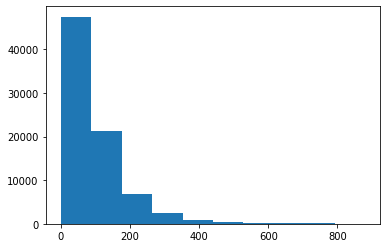

In [88]:
import matplotlib.pyplot as plt
plt.hist(X_train['encoded'].apply(len))

In [89]:
# Hyper parameters to tune later: maxlen, padding
sentence_len = 1024
X_train_encoded =  pad_sequences(X_train['encoded'], maxlen=sentence_len, padding='post', truncating='post')
X_test_encoded = pad_sequences(X_test['encoded'], maxlen=sentence_len, padding='post', truncating = 'post')
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(80000, 1024)
(20000, 1024)


Create model

New Arcitecture: https://aclanthology.org/D14-1181.pdf

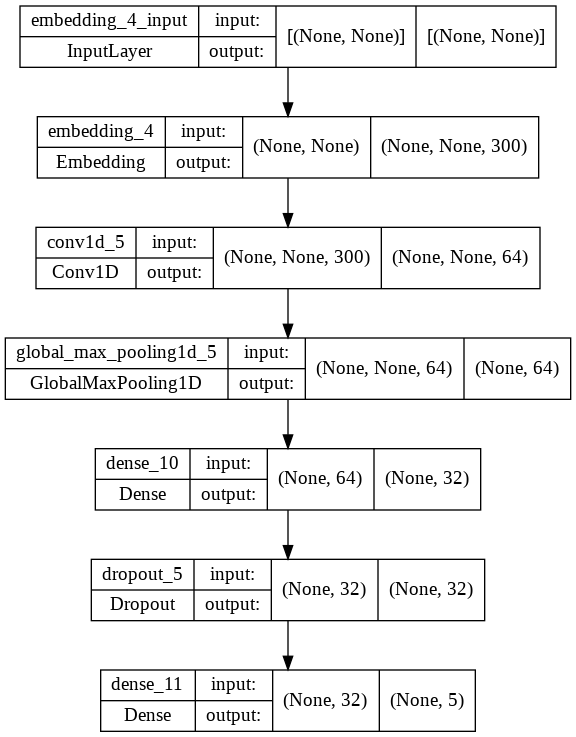

In [90]:
from keras.layers.pooling import GlobalMaxPool1D
from keras import Sequential
from keras.layers import Dense, Embedding, Activation, Dropout
from keras.layers import  MaxPool1D, GlobalMaxPool1D, Conv1D
vocab_size = len(tokenizer.word_counts)
# New model architecture
model2 = Sequential()
model2.add(wv.get_keras_embedding())
model2.add(Conv1D(64,8,activation="relu"))
model2.add(GlobalMaxPool1D())
model2.add(Dense(32, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(5,activation='softmax'))
# model2.add(Dense(1,activation='relu'))
from keras.utils.vis_utils import plot_model
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
plot_model(model2,show_shapes=True)


In [91]:
from keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
callback = EarlyStopping(monitor='val_accuracy', patience=15)

history = model2.fit(X_train_encoded,y_train,
           epochs=150,
           batch_size=128, 
           validation_data = [X_test_encoded, y_test],
           callbacks = [TqdmCallback(verbose=0)],
           verbose=0,)

0epoch [00:00, ?epoch/s]

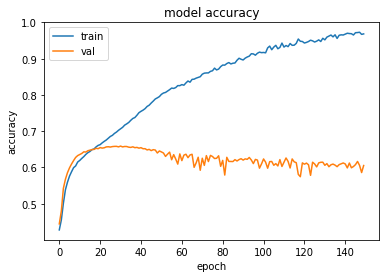

In [92]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [94]:
history.history['val_accuracy']

[0.44429999589920044,
 0.47975000739097595,
 0.5424500107765198,
 0.5674499869346619,
 0.5854499936103821,
 0.5988500118255615,
 0.609499990940094,
 0.6190999746322632,
 0.6276500225067139,
 0.6327499747276306,
 0.6356499791145325,
 0.6386500000953674,
 0.6431499719619751,
 0.642549991607666,
 0.6462000012397766,
 0.647849977016449,
 0.6492000222206116,
 0.6498500108718872,
 0.6528499722480774,
 0.6517999768257141,
 0.6547999978065491,
 0.6534000039100647,
 0.6542999744415283,
 0.6567000150680542,
 0.6571499705314636,
 0.6563000082969666,
 0.6575999855995178,
 0.6581500172615051,
 0.6582499742507935,
 0.6567999720573425,
 0.6589999794960022,
 0.6567500233650208,
 0.6578999757766724,
 0.657800018787384,
 0.656000018119812,
 0.6553500294685364,
 0.6569499969482422,
 0.6546000242233276,
 0.6553999781608582,
 0.6532999873161316,
 0.6546000242233276,
 0.6517000198364258,
 0.6517999768257141,
 0.6483500003814697,
 0.6499500274658203,
 0.6464999914169312,
 0.6491000056266785,
 0.6480500102043

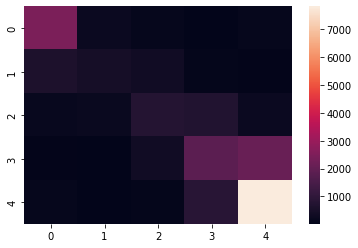

In [26]:
# Generate confusion matrix on test set
test_preds = model2.predict(X_test_encoded)
test_preds_stars = test_preds.argmax(axis=1) + 1
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test + 1, test_preds_stars)
import seaborn as sns
sns.heatmap(cf)